# Import libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from numba import jit

# In-Class Problem: Ising Model

## Application of the Metropolis Method

The following code simulates the Ising model in 2D using the Metropolis algorithm. The main steps of Metropolis algorithm are:

1. Prepare an initial configuration of N spins
2. Flip the spin of a randomly chosen lattice site.
3. Calculate the change in energy dE.
4. If dE < 0, accept the move. Otherwise accept the move with probability $e^{-dE/T}$. This satisfies the detailed balance condition, ensuring a final equilibrium state.
5. Repeat 2-4.

In the code below, we have estimated and plotted energy, magnetization, specific heat and susceptibility of the system.

In [35]:
#----------------------------------------------------------------------
##  BLOCK OF FUNCTIONS USED IN THE MAIN CODE
#----------------------------------------------------------------------

def initialstate(N):   
    
    ''' Generate a random spin configuration for initial condition'''
    
    # Complete in-class
    #
    # generate the initial lattice of size NxN
    # with a random choice of +1 or -1 for each site
    #

    state = np.random.choice([-1, 1], size=(N, N)) # random choice of +1 or -1 for each site

    # return the state
    return state

@jit
def mcmove(config, temp):
    
    '''Monte Carlo move using Metropolis algorithm '''
    
    # loop over each site in 2D lattice
    for ti_ in range(N * N):
        #for tj_ in range(N):
            
            # Complete in-class
            
            #
            # get the configuration for a random site
            #

            i, j = np.random.randint(0, N, 2) # random site

            Eij = config[i, j]
            Enew = -Eij
            diff = Eij - Enew

            
            #
            # calculate the change in energy, dE
            #
            # HINT: calculate the sum over all neighest neighbors,
            # and use %N to account for periodic boundary conditions.
            # for example, config[(a+1)%N,b] where a & b are the 
            # index positions of the random site and N is the 
            # size of the lattice.

            sum = 0
            for di,dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                sum += config[(i + di) % N, (j + dj) % N]
            
            #
            # if dE < 0, accept the spin flip
            # otherwise accept the move with probability exp^{-dE/T}
            #
            dE = diff * sum
            flip = dE < 0 or np.random.rand() < np.exp(-dE / temp)

            
            
            #    
            # update the site
            #       

            if flip:
                config[i, j] = Enew

       
    # return the configuration
    return config


def configPlot(f, config, i, N, n_):

    ''' Plot the configuration once passed to it along with time etc '''

    X, Y = np.meshgrid(range(N), range(N))
    sp =  f.add_subplot(3, 3, n_ )  
    plt.setp(sp.get_yticklabels(), visible=False)
    plt.setp(sp.get_xticklabels(), visible=False)      
    plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
    plt.title('Time=%d'%i); plt.axis('tight')


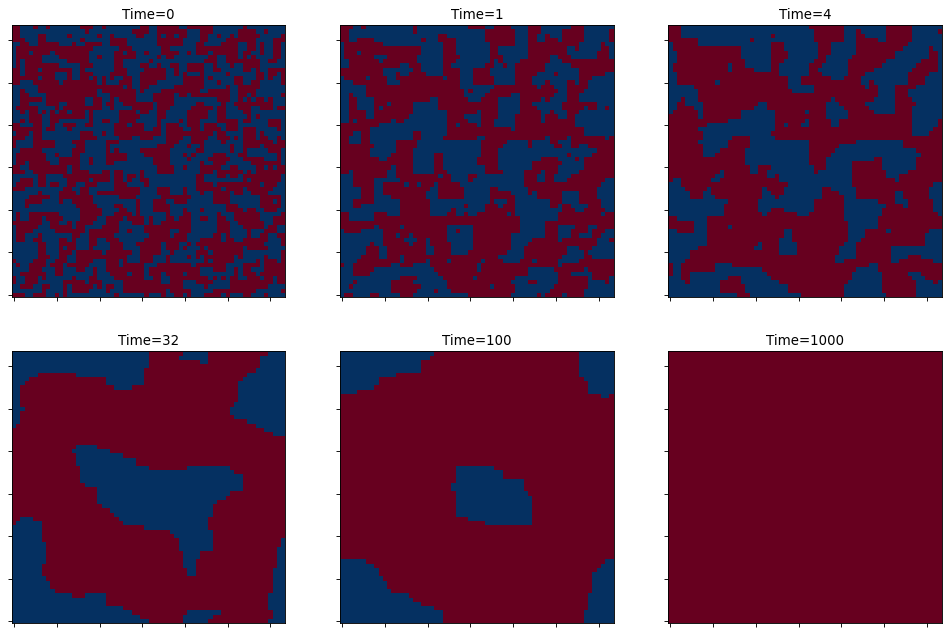

In [44]:
# initialize the size of the lattice & temperature, number of time steps
N = 64; temp = 0.4; msrmnt = 1001

# make some initial move from the initial state
config = mcmove(initialstate(N), temp)

# create figure
f = plt.figure(figsize=(15, 15), dpi=80);    

# add the initial move to the plot
configPlot(f, config, 0, N, 1);

# loop over all steps
for i in range(msrmnt):
    
    # calculate the new configuration
    config = mcmove(config, temp)
    
    # plot at selected time steps
    if i == 1:       configPlot(f, config, i, N, 2);
    if i == 4:       configPlot(f, config, i, N, 3);
    if i == 32:      configPlot(f, config, i, N, 4);
    if i == 100:     configPlot(f, config, i, N, 5);
    if i == 1000:    configPlot(f, config, i, N, 6);
        
# note: this cell may take some time to finish executing

# Site Percolation: Example

Example for one probability:

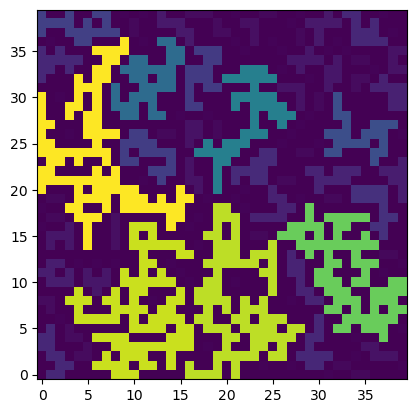

In [48]:
# define lattice size
L=40 
# define probability 
p=0.5 

# create random numbers
z=np.random.rand(L,L) 
# see if less than p
m=z<p 

# measure the clusters based on connectivity
lw,num=ndimage.label(m) 
# lw: matrix for each site in the original array tells what cluster it belongs to
# num: # of unique clusters

# color the clusters based on the size of the clusters 
area=ndimage.sum(m,lw,index=np.arange(num+1)) 
areaImg=area[lw]

plt.imshow(areaImg,origin='lower')

Vary the probability:

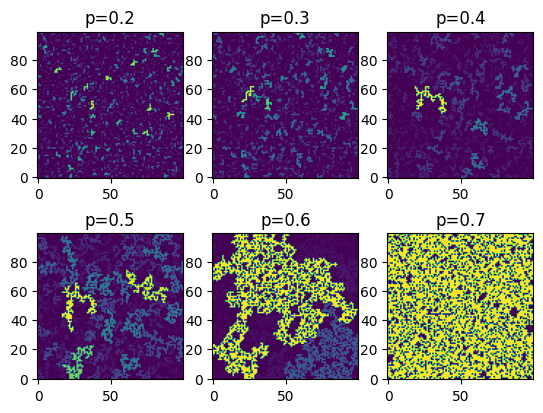

In [3]:
# define # of lattice sites
L=100 
# create random lattice of LxL
z=np.random.rand(L,L) 
# define percolation probabilites
pv=[0.2,0.3,0.4,0.5,0.6,0.7] 

# loop over all probabilities
for i in range(len(pv)): 
    
    # get site percolation for loop iteration
    # find where random matrix is less than threshold
    p=pv[i] 
    m=z<p 
    
    # measure the clusters based on connectivity
    lw,num=ndimage.label(m) 
    # lw: matrix for each site in the original array tells what cluster it belongs to
    # num: # of unique clusters
    
    # color the clusters based on the size of the clusters 
    area=ndimage.sum(m,lw,index=np.arange(num+1)) 
    areaImg=area[lw]
    
    # create plot
    plt.subplot(2,3,i+1) 
    plt.imshow(areaImg,origin='lower') 
    plt.title('p='+str(p)) 
    plt.axis()

Calculate the percolation probability, $\Pi(p,L)$:

Text(0, 0.5, '$\\Pi(p,L)$')

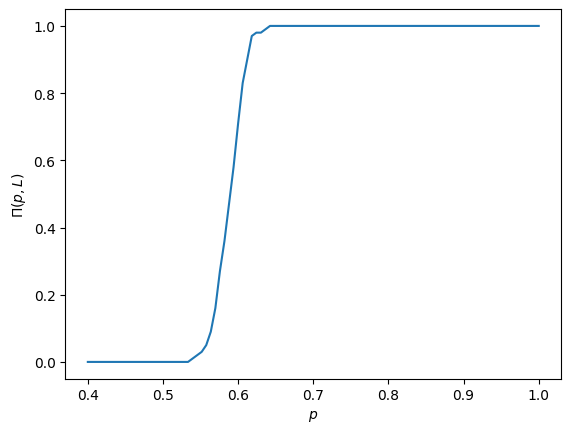

In [4]:
# generate sequence of 100 p_i
p=np.linspace(0.4,1.0,100)
# prepare arraies with same size of p
Ni= np.zeros(len(p)); P=np.zeros(len(p))

# define # of samples 
N=100
# define size of matrix
L=100 

# loop over all samples, for each sample generate new random matrix
for i in range(N): 
    z=np.random.rand(L,L) 
    for ip in range(len(p)): 
        m=z<p[ip] 
        lw,num=ndimage.label(m) 
        perc_x=np.intersect1d(lw[0,:],lw[-1,:]) 
        perc=perc_x[np.where(perc_x>0)] 
        if(len(perc)>0):
            Ni[ip]=Ni[ip]+1 
Pi=Ni/N 
plt.plot(p,Pi) 
plt.xlabel('$p$') 
plt.ylabel('$\Pi(p,L)$')